# Ch05-3 트리의 앙상블

## 정형 데이터와 비정형 데이터

**정형 데이터 Structured data**
- csv 파일에 있는 데이터처럼 정형화되어있는 데이터   
- db, excel, csv 에 저장하기 쉬운 형식  

**비정형 데이터 Unstructured data**
- 텍스트 데이터, 사진, 음악 등   


**앙상블 학습**
- 정형 데이터를 다루는 데 가장 뛰어난 알고리즘  

**신경망 알고리즘**
- 비정형 데이터를 위한 알고리즘  

## 1. 랜덤 포레스트 Random Forest 

- 결정 트리를 랜덤하게 만들어서 결정 트리(나무)의 숲을 만드는 것   
- 각 결정 트리의 예측을 사용해 최종 예측을 만듦    

**랜덤 포레스트의 데이터를 만드는 방식**
- 입력한 훈련 데이터에서 샘플을 랜덤하게 추출   
    - 샘플 데이터가 중복될 수도 있음   

- e.g. 1,000개의 데이터 중 100개를 뽑아야한다면, 먼저 1개를 뽑고 그 데이터를 다시 넣어서 뽑음    

**부트스트랩 샘플 Bootstrap sample** 
- 뽑은 데이터를 다시 넣어서 만든 샘플   = 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식  
- 기본적으로 부트스트랩 샘플은 훈련 세트의 크기와 같게 만듦  

**랜덤 포레스트의 학습 방식**
1. 전체 특성 중 일부 특성을 무작위로 고름 -> 최선의 분할을 찾음   
2. 전체 특성 개수의 제곱근 만큼 특성을 선택  
    - e.g. 전체 특성이 4개라면, 2개만큼 특성을 선택  
3. 기본적으로 100개의 결정 트리를 같은 방식으로 훈련

- 분류일 때,  (샘플을 몇 개의 클래스 중 하나로 분류하는 문제)   
    - 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음  
- 회귀일 때,  ( 임의의 어떤 숫자를 예측하는 문제)   
    - 각 트리의 예측을 평균  


**랜덤 포레스트의 장점**  
- 랜덤하게 선택한 샘플과 특성을 사용하므로, 훈련 세트에 과대적합되는 것을 막아줌  
- 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있음  
- 종종 기본 매개변수 설정만으로도 아주 좋은 결과를 낼 수 있음  

## 화이트 와인 분류하기

In [4]:
# 화이트 와인 분류하기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # 데이터 분할을 위한 모듈
wine = pd.read_csv('https://bit.ly/wine_csv_data') 
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) # 데이터 분할


**cross_validate() 함수를 사용해 교차 검증 수행하기**
- RandomForestClassifier은 기본적으로 100개의 결정 트리 사용.  
    - n_jobs 매개변수를 -1로 지정해서 모든 CPU 코어를 사용하는 것이 좋음  
    - cross_validate()의 n_jobs도 -1로 지정하여 최대한 병렬로 교차 검증 수행하기  
- return_train_Score 매개변수를 True로 지정하면 검증 점수 + 휸련 세트에 대한 점수를 같이 반환  
    - 기본 값은 False 임  
    


In [5]:
from sklearn.model_selection import cross_validate 
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류기
rf = RandomForestClassifier(n_jobs=-1, random_state=42) # 랜덤 포레스트 분류기 객체 생성
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) # 교차 검증 수행
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # 훈련 세트와 테스트 세트 점수 출력

0.9973541965122431 0.8905151032797809


>>"출력된 결과를 보면 훈련 세트에 다소 과대적합된 것 같습니다. 여기에서는 알고리즘을 조사하는 것이 목적이므로 매개변수를 더 조정하지 않도록 하겠습니다"


이 결과를 보면 훈련 세트 점수가 테스트 세트보다 훨씬 높습니다.

**🔍 왜 “과대적합(overfitting)”이라고 하는가?**

과대적합은 모델이 훈련 데이터에 너무 잘 맞아서, 새로운(보지 못한) 데이터에서는 성능이 떨어지는 현상을 말합니다.
즉, 훈련 세트 성능 ≫ 테스트 세트 성능일 때 의심됩니다.

현재 결과를 보면:
훈련 세트(train_score) 평균 ≈ 0.997
테스트 세트(test_score) 평균 ≈ 0.891
→ 훈련 세트에서는 거의 완벽히 맞추지만,
→ 테스트 세트에서는 약 10% 정도 성능이 떨어짐.
이런 경우 “다소 과대적합된 것 같다”고 판단합니다.

**⚙️ 왜 “매개변수를 조정하지 않겠다”고 하는가?**

이 코드는 랜덤 포레스트(RandomForestClassifier) 알고리즘을 탐색(조사) 하는 예시 코드입니다.
즉, 목적이 *“성능 최적화”가 아니라 “랜덤 포레스트가 어떻게 작동하는지 실습으로 이해하는 것”*이에요.

그래서:
지금은 단지 알고리즘이 훈련 세트에서는 매우 잘 맞고, 테스트 세트에서는 약간 떨어진다는 것을 관찰하는 게 목적이고,
하이퍼파라미터(예: n_estimators, max_depth, min_samples_leaf 등) 를 조정해서 성능을 올리는 건 다음 단계에서 다룰 내용이기 때문에
“여기에서는 매개변수를 더 조정하지 않겠습니다.”
라고 한 것입니다.

### Randomforeast 의 매개 변수  
랜덤 포레스트는 결정 트리의 앙상블이므로 DecisionTreeClassifier가 제공하는 중요 매개 변수를 모두 제공  
- criterion, max_depth, max_features, min_samples_split, min_impurity_decrease, min_samles_leaf  emd  

In [6]:
#randomforest 모델을 훈련 세트에 훈련한 후 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


5-1의 결정 트리에서의 
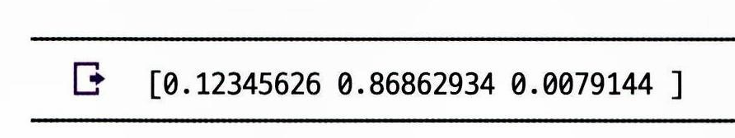

알코올 도수와 pH특성의 중요도가 조금 상승했음  
- 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문.  


In [7]:
rf= RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라 트리

기본적으로 100개의 결정 트리를 훈련하는데,  
부트스트랩 샘플을 사용하지 않는다.  

즉, 각 결정 트리를 만들 때 전체 훈련 세트를 사용.  
대신 노드 분할 시 가장 좋은 분할을 찾는 것이 아닌 무작위 분할  

> 성능은 낮아지지만 많은 트리를 앙상블 하므로 과대적합을 막고 검증 세트의 점수를 높이는 효과가 잇음  

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9974503966084433 0.8887848893166506


랜덤 포레스트와 비슷한 결과  
지금은 특성이 많지 않은 상태라 두 모델의 차이가 크지 않지만, 보통 엑스트라 트리는 무작위성이 더 크기때문에 랜덤포레스트보다 더 많은 결정 트리를 훈련해야함  

In [10]:
#특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레디언트 부스팅 Gradient boosting

깊이가 얕은 결정 트리를 사용해 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법  

- 기본적으로 깊이가 3인 결정 트리를 100개 사용  
    - 깊이가 얕은 결정 트리를 사용하므로 과대적합에 강함
    - 또한, 일반적으로 높은 일반화 성능을 기대할 수 있음

그레디언트 부스팅은 **'경사 하강법** 을 사용하여 트리를 앙상블에 추가  
- 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동  

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


과대적합이 되지 않고, 유사한 점수 확인

In [12]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9464595437171814 0.8780082549788999


결정 트리 개수를 500개로 설정해도 과대적합을 잘 억제함  

In [ ]:
gb.fit(train_input, train_target) #모델 훈련
print(gb.feature_importances_) #특성 중요도 출력

[0.15887763 0.6799705  0.16115187]


학습률 learning_rate의 기본 값은 0.1  
그러나 그레디언트 부스팅이 랜덤 포레스트보다 일부 특성에 더 집중하고 있음 (당도)

**Subsample**  
트리 훈련에 사용할 훈련 세트의 비율을 정하는 subsample  
기본값 = 1.0  = 전체 훈련 세트를 사용  
< 1.0 = 훈련 세트의 일부를 사용  

일반적으로 그레디언트 부스팅이 랜덤 포레스트보다 조금 더 높은 성능  그러나 순서대로 트리를 추가하므로 훈련 속도가 느림  

그레디언트 부스팅의 속도와 성능을 개선한 것 = **히스토그램 기반 그레디언트 부스팅** 

## 히스토그램 기반 그레디언트 부스팅

정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 높은 알고리즘  
1. 입력 특성을 256 구간으로 나눔  
    - 노드 분할 시 최적의 분할을 매우 빠르게 찾을 수 있음  
2. 256개 구간 중 하나를 떼어 놓고 누락된 값을 위해 사용  
    - 입력에 누락된 특성이 있어도 따로 전처리할 필요가 없음  


In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


히스토그램 기반 그레디언트 부스팅은 자체적으로 특성 중요도를 제공하지 않음  
`permutation_importance()` 를 사용  
- 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지 관찰 -> 어떤 특성이 중요한지 계산  

In [17]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)  

[0.08876275 0.23438522 0.08027708]


특성 중요도 (importances), 평균(importances_mean), 표준 편차(importances_std)

In [18]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


그레디언트 부스팅처럼 조금 더 당도에 집중하고 있음



In [19]:
# histgradientboostingclassifier 모델을 통해 테스트 세트 성능 최종 확인
hgb.score(test_input, test_target)

0.8723076923076923

### Histogram 회귀 버전
`HistGradientBoostingRegressor` class  

대표적인 라이브러리 `XGBoost`  
tree_method 매개변수를 ‘hist’로 지정하면 히스토그램 기반 그레이디언트 부스팅을 사용할 수 있음 
(설치해야함)
`(ai-study) 000@000:~$ conda install -c conda-forge xgboost`
`(ai-study) 000@000:~$ pip install lightgbm`

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9556957943294243 0.8803187236247872


In [26]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42, verbose=-1)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))    

0.935828414851749 0.8801251203079884
